# Type-token ratio

As was discussed in one of the previous notebooks, the individual words that are found in a text are referred to as “tokens”, and the unique words are called “types”. Frequency lists count occurrences of types. The ratio between the number of types and the number of tokens can, under certai conditions, offer useful information about texts as well. The type-token ratio is calculated by dividing the number of types by the number of tokens. This division obviously results a number in between 0 and 1. This number gives an indication of the lexical diversity: the capacity of the author to vary the vocabulary. If the type-token ratio is high, this indicates that the author uses many unique words and that the text contains very little lexical repetition. If, by contrast, the type-token ratio is low, this implies that same words recur frequently, and that there is a low level of lexical diversity. 

The code below demonstrates how the type-token ratio may be calculated, using the `word_tokenize()` function from the nltk library.  

The function `set()` can be used to convert a list into a set. A set is default data structure in Python, which is very similar to a list. An important difference, however, is that a list can only contain unique items. The `set()` can be used very effectively to deduplicate a Python list.

In [1]:
from os.path import join
import re
from nltk import word_tokenize


dir = 'Corpus'
text = 'ARoomWithAView.txt'
path = join( dir, text )

with open( path , encoding = 'utf-8' ) as file:
    full_text = file.read()
    full_text = full_text.lower()

words = word_tokenize(full_text)

for w in words: 
    if not( re.search( r'\w' , w )):
        words.remove(w)

tokens = len(words)
unique_words = set(words)
types = len(unique_words)

ttr = types / tokens

print( f'Types: {types}' )
print( f'Tokens: {tokens}' )
print( f'Type-token ratio: {ttr}' )

Types: 7472
Tokens: 70763
Type-token ratio: 0.10559190537427751


The code that is given above can also be applied to all the texts in a corpus. This may enable us to compare the lexical diversity of all the texts that are studied. 

The code below defines a function named `ttr()` with takes a reference to a text as a parameter. It opens the file, accesses the full text and calculates the type-token ratio using the same fomula that was explained above. 

In [2]:
import os
import re
from os.path import join
from nltk import word_tokenize

def removeExtension(text):
    new_text = re.sub( '\.txt' , '' , text )
    return new_text
    

def ttr(full_text):

    words = word_tokenize(full_text)
    
    for w in words: 
        if not( re.search( r'\w' , w )):
            words.remove(w)

    tokens = len(words)
    unique_words = set(words)
    types = len(unique_words)

    return types / tokens
    
    
dir = 'Corpus'    
for text in os.listdir(dir):
    if re.search( r'\.txt' , text ):
        path = join( dir , text) 
        with open( path , encoding = 'utf-8' ) as file:
            full_text = file.read()
            full_text = full_text.lower()
        
        print( f'{ removeExtension(text) }: {ttr(full_text)} ' )


SonsandLovers: 0.061944594195085474 
Ivanhoe: 0.07769886363636364 
TheHappyPrince: 0.25316455696202533 
ThroughtheLookingGlass: 0.10367586686035496 
HeartofDarkness: 0.15799907316821996 
MobyDick: 0.09097925002411719 
ARoomWithaView: 0.10559190537427751 
TreasureIsland: 0.09030661465542553 
ATaleofTwoCities: 0.07612329310442519 
PrideandPrejudice: 0.05447387087261801 
VanityFair: 0.059511467772487586 


When you work with the type-token ratios, it is important to realise that
the result of such calculations tend to vary along with the total length of the text. In a relatively short text, it is easier for an author to continue to introduce new words as the text progresses. When texts become much longer, however, the chance that words will be repeated also increase accordingly. Shorter texts generally have much higher type-token ratios. 

One solution can be to ensure that all the texts have the same lengths before calculating the type token ratios. We may firstly calculate the lenght (i.e. the total number of words) of the shortest text in the corpus. Next, we can artifically harmonise the lengths of all the lengths by creating substrings of the longer texts. These substrings should have exactly the same number of words as the shortest text in the corpus. The code below illustrates this principle.  

The code below reuses the function `ttr()` defined in the code above, so make sure that you have run the cell above beove you run the cell below. You can also choose to run all cells of this notebook by choosing "Cell" > "Run all" form the menu at the top.  

In [3]:
dir = 'Corpus'
texts = []
min_tokens = 0 

for text in os.listdir(dir):
    if re.search( r'\.txt' , text ):
        texts.append(text)
        path = join( dir , text) 
        with open( path , encoding = 'utf-8' ) as file:
            full_text = file.read()
            words = word_tokenize(full_text)
            tokens = len(words)
            print( f'{text} contains {tokens} words.' )
            if min_tokens == 0:
                min_tokens = tokens
            elif tokens < min_tokens:
                min_tokens = tokens
                
print( f'\nShortest text has {min_tokens} words.' )

ttr_scores = dict()
                
            
for text in texts:
    if re.search( r'\.txt' , text ):
        path = join( dir , text) 
        with open( path , encoding = 'utf-8' ) as file:
            full_text = file.read()
            full_text = full_text.lower()
            full_text = full_text[ 0 : min_tokens]
        
        print( f'{ removeExtension(text) }: {ttr(full_text)} ' )
        ttr_scores[ removeExtension(text) ] = ttr(full_text)

SonsandLovers.txt contains 204248 words.
Ivanhoe.txt contains 210932 words.
TheHappyPrince.txt contains 4170 words.
ThroughtheLookingGlass.txt contains 36906 words.
HeartofDarkness.txt contains 44569 words.
MobyDick.txt contains 252637 words.
ARoomWithaView.txt contains 83152 words.
TreasureIsland.txt contains 82892 words.
ATaleofTwoCities.txt contains 165058 words.
PrideandPrejudice.txt contains 143598 words.
VanityFair.txt contains 355466 words.

Shortest text has 4170 words.
SonsandLovers: 0.4643835616438356 
Ivanhoe: 0.5264663805436338 
TheHappyPrince: 0.417910447761194 
ThroughtheLookingGlass: 0.3955773955773956 
HeartofDarkness: 0.5026455026455027 
MobyDick: 0.5477239353891337 
ARoomWithaView: 0.4060975609756098 
TreasureIsland: 0.4793608521970706 
ATaleofTwoCities: 0.5101763907734057 
PrideandPrejudice: 0.357311320754717 
VanityFair: 0.5163934426229508 


The final line of the code above populates a dictionary named `ttr_score`. The titles of the texts in the corpus serve as keys. The type-token ratios that are calculated are stored as the values. 

This dictionary can be used to visualise the type-token ratios in a bar chart.

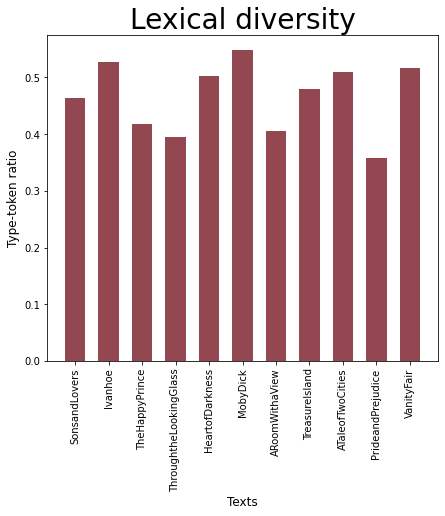

In [4]:
%matplotlib inline


x_axis = list(ttr_scores.keys())
y_axis = list(ttr_scores.values())

import matplotlib.pyplot as plt
import pandas as pd


fig = plt.figure( figsize=( 7 ,6 ) )
ax = plt.axes()


bar_width = 0.6
opacity = 0.8

ax.bar( x_axis , y_axis , width = bar_width, alpha = opacity , color = '#781926')

plt.xticks(rotation= 90)

ax.set_xlabel('Texts' , fontsize= 12)
ax.set_ylabel('Type-token ratio' , fontsize = 12 )
ax.set_title( 'Lexical diversity' , fontsize=28 )


plt.show()

